In [1]:
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import random
import pdb
import cv2
from autoaugment import ImageNetPolicy, CIFAR10Policy, SVHNPolicy, SubPolicy
import pandas as pd

In [5]:
img = Image.open("tensorflow/workspace/images/images_v3_reducedsmallbox/train/3.jpg")
bbox = [202,	300,	228,	354]


In [ ]:


def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(4,4, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()



policy = ImageNetPolicy()
#policy = CIFAR10Policy()
#policy = SVHNPolicy()
imgs = []
for _ in range(16): imgs.append(policy(img))
show_sixteen(imgs)



In [9]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from bbaug.policies import policies
import matplotlib.pyplot as plt

aug_policy = policies.policies_v3()
aug_policy.pop(13) #only for v3
aug_policy.pop(9) #only for v3
aug_policy_container = policies.PolicyContainer(aug_policy)

df_name = pd.read_csv("../../FYP_MATLAB/filename.csv",header=None)
df_data = pd.read_csv("../../FYP_MATLAB/labels_train.csv")
filename = df_name.iloc[1].item()
img = np.array(Image.open("../../FYP_MATLAB/train/{}".format(filename)))
plt.imshow(img)
boxes = np.array(df_data[df_data['Filename']==filename][['xmin','ymin','xmax','ymax']])
labels = np.array(df_data[df_data['Filename']==filename]['id'])
print(boxes)
random_policy = aug_policy_container.select_random_policy()
print(random_policy)
img_aug, bbs_aug = aug_policy_container.apply_augmentation(
                random_policy,
                 img,
                 boxes,
                 labels,
            )
     
for box in list(boxes):
     img = cv2.rectangle(img, (box[0],box[1]), (box[2],box[3]), (0,255,0), 2)
plt.imshow(img)


NameError: name 'plt' is not defined

[[ 48 214  90 259]]


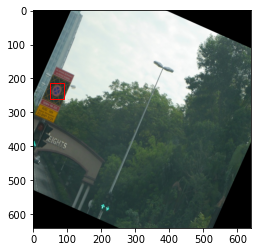

In [3]:
bbox = bbs_aug[:,1:]
labels = bbs_aug[:,0]
print(bbox)
fig, ax = plt.subplots()
ax.imshow(img_aug)
my_xml = "<annotation>\n\t<folder>Export</folder>\n\t<filename>"
my_xml += filename
my_xml +="</filename>\n\t<path>D:\Assignment\FYP\my_tensorflow\Export\\"+filename+"</path>\n"
my_xml +="\t<source>\n"
my_xml +="\t\t<database>Unknown</database>\n"
my_xml +="\t</source>\n"
my_xml +="\t<size>\n"
my_xml +="\t\t<width>640</width>\n"
my_xml +="\t\t<height>640</height>\n"
my_xml +="\t\t<depth>3</depth>\n"
my_xml +="\t</size>\n"
my_xml +="\t<segmented>0</segmented>\n"

translate_label = ["noentry","nostop","bumper","giveway","trafficlight"]
for box in bbs_aug:
     label = box[0]
     box = box[1:]
     my_xml +="\t<object>\n"
     my_xml +="\t\t<name>"+ translate_label[label]+"</name>\n"
     my_xml +="\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n"
     my_xml +="\t\t<bndbox>\n"
     my_xml +="\t\t\t<xmin>" + str(box[0])+"</xmin>\n"
     my_xml +="\t\t\t<ymin>" + str(box[1])+"</ymin>\n"
     my_xml +="\t\t\t<xmax>" + str(box[2])+"</xmax>\n"
     my_xml +="\t\t\t<ymax>" + str(box[3])+"</ymax>\n"
     my_xml +="\t\t</bndbox>\n"
     my_xml +="\t</object>\n"
     rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
     ax.add_patch(rect)
plt.show()

my_xml += "</annotation>"

In [180]:
with open("../../FYP_MATLAB/my.xml", 'w') as f:
    f.write(my_xml)

Image Augmentation

In [8]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from bbaug.policies import policies
import pandas as pd
import numpy as np
from PIL import Image, ImageEnhance, ImageOps

In [40]:
aug_policy = policies.policies_v3()
aug_policy = list(filter(lambda pol:not ('Translate' in str(pol)), aug_policy)) #for v2
aug_policy = list(filter(lambda pol:not('Cutout' in str(pol)),aug_policy)) #for v3

aug_policy_container = policies.PolicyContainer(aug_policy)

df_name = pd.read_csv("../../FYP_MATLAB/filename.csv",header=None)
df_data = pd.read_csv("../../FYP_MATLAB/labels_train.csv")

translate_label = ["noentry","nostop","bumper","giveway","trafficlight"]

for i in range(219):
     filename = df_name.iloc[i].item()
     img = np.array(Image.open("../../FYP_MATLAB/train/{}".format(filename)))
     #plt.imshow(img)
     boxes = np.array(df_data[df_data['Filename']==filename][['xmin','ymin','xmax','ymax']])
     labels = np.array(df_data[df_data['Filename']==filename]['id'])
     #print(boxes)
     random_policy = aug_policy_container.select_random_policy()
     #print(random_policy)
     img_aug, bbs_aug = aug_policy_container.apply_augmentation(
                    random_policy,
                    img,
                    boxes,
                    labels,
               )

     im = Image.fromarray(img_aug)
     im.save("../../FYP_MATLAB/export/DA/SVHN/train/{}_aug.jpg".format(filename[0:-4]))
     
     bbox = bbs_aug[:,1:]
     labels = bbs_aug[:,0]

     my_xml = "<annotation>\n\t<folder>Export</folder>\n\t<filename>"
     my_xml += filename[0:-4]+"_aug.jpg"
     my_xml +="</filename>\n\t<path>D:\Assignment\FYP\my_tensorflow\Export\\"+filename[0:-4]+"_aug.jpg</path>\n"
     my_xml +="\t<source>\n"
     my_xml +="\t\t<database>Unknown</database>\n"
     my_xml +="\t</source>\n"
     my_xml +="\t<size>\n"
     my_xml +="\t\t<width>640</width>\n"
     my_xml +="\t\t<height>640</height>\n"
     my_xml +="\t\t<depth>3</depth>\n"
     my_xml +="\t</size>\n"
     my_xml +="\t<segmented>0</segmented>\n"

     for box in bbs_aug:
          label = box[0]
          box = box[1:]
          my_xml +="\t<object>\n"
          my_xml +="\t\t<name>"+ translate_label[label]+"</name>\n"
          my_xml +="\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n"
          my_xml +="\t\t<bndbox>\n"
          my_xml +="\t\t\t<xmin>" + str(box[0])+"</xmin>\n"
          my_xml +="\t\t\t<ymin>" + str(box[1])+"</ymin>\n"
          my_xml +="\t\t\t<xmax>" + str(box[2])+"</xmax>\n"
          my_xml +="\t\t\t<ymax>" + str(box[3])+"</ymax>\n"
          my_xml +="\t\t</bndbox>\n"
          my_xml +="\t</object>\n"
     
     my_xml += "</annotation>"

     with open("../../FYP_MATLAB/export/DA/SVHN/train/{}_aug.xml".format(filename[0:-4]), 'w') as f:
          f.write(my_xml)

In [38]:
#list(filter(lambda pol:not ('Translate_Y' in str(pol)), aug_policy))
# aug_policy = policies.policies_v3()
# aug_policy = list(filter(lambda pol:not('Cutout' in str(pol)),aug_policy))
# print(aug_policy)

random_policy

[policy(name='Posterize', probability=0.8, magnitude=2),
 policy(name='Translate_X', probability=1.0, magnitude=8)]

In [39]:
aug_policy

[[policy(name='Posterize', probability=0.8, magnitude=2),
  policy(name='Translate_X', probability=1.0, magnitude=8)],
 [policy(name='Rotate', probability=0.6, magnitude=8),
  policy(name='Rotate', probability=0.8, magnitude=10)],
 [policy(name='Equalize', probability=0.8, magnitude=10),
  policy(name='Auto_Contrast', probability=0.2, magnitude=10)],
 [policy(name='Sharpness', probability=0.0, magnitude=2),
  policy(name='Color', probability=0.4, magnitude=8)],
 [policy(name='Posterize', probability=0.6, magnitude=2),
  policy(name='Rotate', probability=0.0, magnitude=10)],
 [policy(name='Auto_Contrast', probability=0.6, magnitude=0),
  policy(name='Rotate', probability=1.0, magnitude=6)],
 [policy(name='Contrast', probability=0.0, magnitude=2),
  policy(name='Shear_Y', probability=0.8, magnitude=0)],
 [policy(name='Auto_Contrast', probability=0.8, magnitude=10),
  policy(name='Contrast', probability=0.2, magnitude=10)],
 [policy(name='Solarize_Add', probability=0.8, magnitude=6),
  po

Image-to-image translation

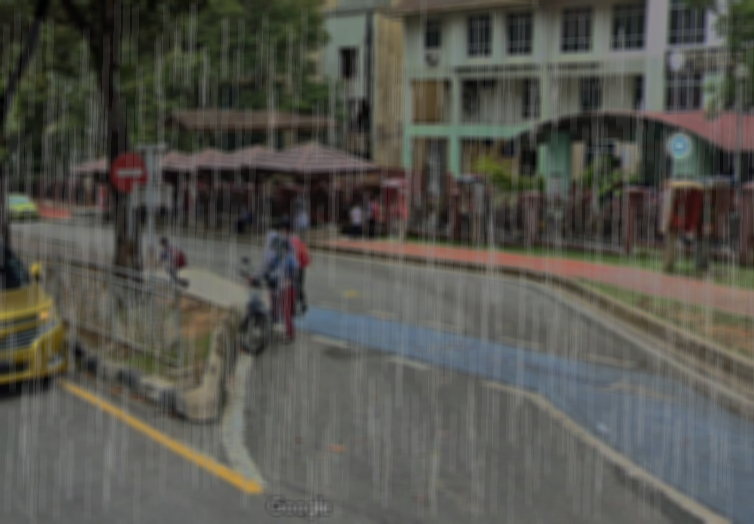

In [14]:
import Automold as am
import Helpers as hp
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
from numpy.random import choice
import random
import pandas as pd
import os
import shutil
import time
from IPython.display import display

IMAGE_NAME = '16'
IMAGE_PATH = os.path.join('tensorflow','workspace','images', 'test','new_test',IMAGE_NAME+'.jpg')
img = np.array(Image.open(IMAGE_PATH))

rain_type = choice(['drizzle','heavy','torrential'], 1,
                  p=[1,0.0,0.0])[0]
aug_image= am.add_rain(img,rain_type='torrential')
#aug_image = am.add_fog(img,fog_coeff=0.2)
display(Image.fromarray(aug_image))


In [2]:
df_name = pd.read_csv("../../FYP_MATLAB/filename.csv",header=None)
start = time.time()
for i in range(219):
    filename = df_name.iloc[i].item()
    img = np.array(Image.open("../../FYP_MATLAB/train/{}".format(filename)))

    #case 1
    rain_type = choice(['drizzle','heavy','torrential'], 1, p=[0.4,0.3,0.3])[0]
    aug_image= am.add_rain(img,rain_type=rain_type)

    # case 2
    rain_type = choice(['drizzle','heavy','torrential'], 1,
                  p=[0.8,0.1,0.1])[0]
    aug_image= am.add_rain(img,rain_type=rain_type)
    if(random.random()<0.3):
        my_rand = random.random()/4+0.1
        #print(my_rand)
        aug_image = am.add_fog(aug_image,fog_coeff=my_rand) 

    # #case 3
    # rain_type = choice(['drizzle','heavy','torrential'], 1,
    #               p=[0.6,0.3,0.1])[0]
    # aug_image= am.add_rain(img,rain_type=rain_type)
    # if(random.random()<0.2):
    #     aug_image = am.darken(aug_image,darkness_coeff=random.random()/2)    
    
    im = Image.fromarray(aug_image)
    im.save("../../FYP_MATLAB/export/I2IT/case5/train/{}_aug.jpg".format(filename[0:-4]))
    
    dest_dir = "../../FYP_MATLAB/export/I2IT/case5/train/{}_aug.xml".format(filename[0:-4])
    shutil.copy("tensorflow/workspace/images/images_v3_reducedsmallbox/train/{}.xml".format(filename[0:-4]),dest_dir)

    with open("../../FYP_MATLAB/export/I2IT/case5/train/{}_aug.xml".format(filename[0:-4]), 'r') as f:
        res = f.read().replace('.jpg', '_aug.jpg')

    with open("../../FYP_MATLAB/export/I2IT/case5/train/{}_aug.xml".format(filename[0:-4]),'w') as f:
        f.write(res)
print("Total time {}".format(time.time()-start))
# #case 1
# rain_type = choice(['drizzle','heavy','torrential'], 1,
#               p=[0.4,0.3,0.3])[0]
# aug_image= am.add_rain(img,rain_type=rain_type)

# #case 2
# rain_type = choice(['drizzle','heavy','torrential'], 1,
#               p=[0.4,0.3,0.3])[0]
# aug_image= am.add_rain(img,rain_type=rain_type)
# if(random.random()<0.3):
#     aug_image = am.add_fog(aug_image,fog_coeff=random.random()/2)


# #case 3
# rain_type = choice(['drizzle','heavy','torrential'], 1,
#               p=[0.4,0.3,0.3])[0]
# aug_image= am.add_rain(img,rain_type=rain_type)
# if(random.random()<0.3):
#     aug_image = am.darken(aug_image,darkness_coeff=random.random()/2)


# #case 4
# rain_type = choice(['drizzle','heavy','torrential'], 1,
#               p=[0.4,0.3,0.3])[0]
# aug_image= am.add_rain(img,rain_type=rain_type)
# if(random.random()<0.3):
#     aug_image = am.add_fog(aug_image,fog_coeff=random.random()/2)
# if(random.random()<0.3):
#     aug_image = am.darken(aug_image,darkness_coeff=random.random()/2)



#hp.visualize([img,rain_images,fog_images,dark_images],column=2)

Total time 31.787387371063232


In [59]:
print(random.random())
print(random.random())


0.24117715419967467
0.5039341038228153


In [18]:
import os

files = os.listdir("../../FYP_MATLAB/export/Combine/Case4/train")

for file in files:
    src = "../../FYP_MATLAB/export/Combine/Case4/train/{}".format(file)
    dst = "../../FYP_MATLAB/export/Combine/Case4/train/{}_I2IT{}".format(file[:-4],file[-4:])

    os.rename(src,dst)

    if file[-4:]==".xml":
        with open("../../FYP_MATLAB/export/Combine/Case4/train/{}_I2IT.xml".format(file[0:-4]), 'r') as f:
            res = f.read().replace('.jpg', '_I2IT.jpg')

        with open("../../FYP_MATLAB/export/Combine/Case4/train/{}_I2IT.xml".format(file[0:-4]),'w') as f:
            f.write(res)


In [10]:
dst

'../../FYP_MATLAB/export/Combine/test/9_aug_I2IT.xml'

In [11]:
src

'../../FYP_MATLAB/export/Combine/test/9_aug.xml'

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time
from PIL import Image,ImageOps
im1 = Image.open("rainyimages/giveway1.jpg")
im1 = ImageOps.autocontrast(im1,cutoff=100)
im2 = ImageOps.equalize(im1)
im2 = ImageOps.autocontrast(im2,cutoff=100)
img = np.array(im2)
img = img[:, :, ::-1].copy() 
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [47]:
src = "../../FYP_MATLAB/train/"
dst = "../../FYP_MATLAB/export/Combine/testing_time/"
files = []
for img in os.listdir(src):
    if(img.endswith(".jpg")):
        files.append(img)

In [29]:
#-----Reading the image-----------------------------------------------------
num = 4

# img = cv2.imread(src+files[num], 1)


def apply_CLAHE(img):
    #-----Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(32,32))
    cl = clahe.apply(l)
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final
# start = time.time()
# for img_path in files:
# #for i in range(10):
#     #img_path = files[i]
#     image = cv2.imread(src + img_path)
    
#     auto_result=apply_CLAHE(image)
#     save_path = dst+img_path
#     cv2.imwrite(save_path,auto_result)
# end = time.time()   

# print("Time taken:",str(end-start),"s")

# for i in range(10):
#     img = cv2.imread(src+files[i], 1)
#     auto_result=apply_CLAHE(img)
#     cv2.imshow(files[num],img) 
#     cv2.imshow("clahe=5",auto_result)
#     cv2.waitKey()


# cv2.destroyAllWindows()

In [30]:
image = cv2.imread('rainyimages/giveway1.jpg')
auto_result=apply_CLAHE(image)
cv2.imshow("img",auto_result)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
from PIL import Image,ImageOps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [56]:
image = Image.open("../../FYP_MATLAB/export/Combine/test/161.jpg")

src = "../../FYP_MATLAB/export/Combine/test_rain/"
dst = "../../FYP_MATLAB/export/Combine/test_rain_CLAHE/"
files = []
for img in os.listdir(src):
    if(img.endswith(".jpg")):
        files.append(img)


In [57]:
for file in files:
    image = Image.open(src+file)
    image = ImageOps.autocontrast(image,0.5)
    opencvImage = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    cv2.imwrite(dst+file,opencvImage)

In [76]:
from PIL import Image,ImageOps, ImageEnhance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = Image.open("../../FYP_MATLAB/export/Combine/test/161.jpg")
a = 1
b = 0
c = 100 #left/right (i.e. 5/-5)
d = 0
e = 1
f = 0 #up/down (i.e. 5/-5)
img = image.transform(image.size, Image.AFFINE, (a, b, c, d, e, f))
img

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time


src = "../../FYP_MATLAB/train/"
dst = "../../FYP_MATLAB/export/Combine/testing_time/"
files = []
for img in os.listdir(src):
    if(img.endswith(".jpg")):
        files.append(img)

In [24]:
# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=10):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    
    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result)

In [25]:
start = time.time()
for img_path in files:
        image = cv2.imread(src+img_path)
        auto_result = automatic_brightness_and_contrast(image)
        save_path = dst+img_path
        cv2.imwrite(save_path,auto_result)
end = time.time()

print("Time taken:",str(end-start),"s")

Time taken: 8.64705204963684 s


In [47]:
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import tensorflow as tf
import PIL 

In [ ]:
log_dir = "lightning_logs/version_1"

event_accumulator = EventAccumulator('Tensorflow\workspace\models\my_ssd_mobnet_640_v8_case4_7500_bs8_steps\eval')
event_accumulator.Reload()
events = event_accumulator.Images()

In [35]:
event_accumulator.Tags()['tensors']

['eval_side_by_side_0_0',
 'eval_side_by_side_1_0',
 'eval_side_by_side_2_0',
 'eval_side_by_side_3_0',
 'eval_side_by_side_4_0',
 'eval_side_by_side_5_0',
 'eval_side_by_side_6_0',
 'eval_side_by_side_7_0',
 'eval_side_by_side_8_0',
 'eval_side_by_side_9_0',
 'eval_side_by_side_10_0',
 'eval_side_by_side_11_0',
 'eval_side_by_side_12_0',
 'eval_side_by_side_13_0',
 'eval_side_by_side_14_0',
 'eval_side_by_side_15_0',
 'eval_side_by_side_16_0',
 'eval_side_by_side_17_0',
 'eval_side_by_side_18_0',
 'eval_side_by_side_19_0',
 'eval_side_by_side_20_0',
 'eval_side_by_side_21_0',
 'eval_side_by_side_22_0',
 'eval_side_by_side_23_0',
 'eval_side_by_side_24_0',
 'eval_side_by_side_25_0',
 'eval_side_by_side_26_0',
 'eval_side_by_side_27_0',
 'eval_side_by_side_28_0',
 'eval_side_by_side_29_0',
 'eval_side_by_side_30_0',
 'eval_side_by_side_31_0',
 'eval_side_by_side_32_0',
 'eval_side_by_side_33_0',
 'eval_side_by_side_34_0',
 'eval_side_by_side_35_0',
 'eval_side_by_side_36_0',
 'Detection

In [39]:
tensors = []
for scalar in event_accumulator.Tags()["tensors"]:
    tensors.append(event_accumulator.Tensors(scalar))


In [51]:
img = PIL.Image.open(tensors[0][0].numpy())


AttributeError: 'TensorEvent' object has no attribute 'numpy'